In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv("/content/drive/MyDrive/train_u6lujuX_CVtuZ9i.csv")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


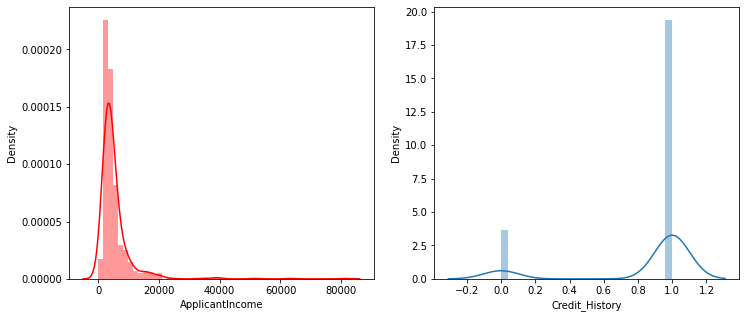

In [4]:
#plotting the using distplot
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data['ApplicantIncome'], color='r')
plt.subplot(122)
sns.distplot(data['Credit_History'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


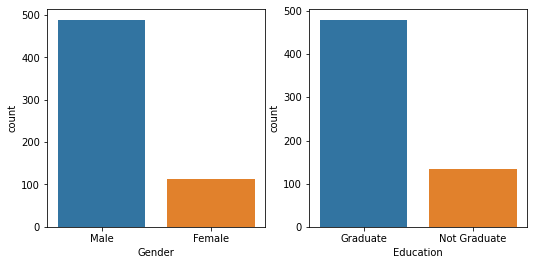

In [5]:
#plotting the count plot
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(data['Gender'])
plt.subplot(1,4,2)
sns.countplot(data['Education'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 67.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


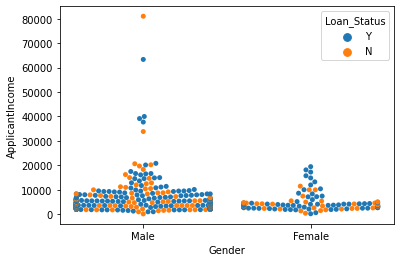

In [6]:
#visulaized based gender and income what would be the appplication status 
sns.swarmplot(data['Gender'], data['ApplicantIncome'], hue = data['Loan_Status'])

In [7]:
data.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

In [10]:
numerical_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [11]:
categorical_columns

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [ ]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [ ]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [ ]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [ ]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [ ]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [13]:
data['Loan_ID']= label_encoder.fit_transform(data['Loan_ID'])
data['Loan_ID'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int64  
 1   Gender             614 non-null    int64  
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 62.5+ KB


In [12]:
# Import label encoder 

from sklearn import preprocessing 

  
# label_encoder object knows how to understand word labels. 

label_encoder = preprocessing.LabelEncoder() 

  
# Encode labels in column 'Gender'. 

data['Gender']= label_encoder.fit_transform(data['Gender']) 

  

data['Gender'].unique()

array([1, 0, 2])

In [14]:
data['Married']= label_encoder.fit_transform(data['Married'])
data['Married'].unique()

array([0, 1, 2])

In [15]:
data['Dependents']= label_encoder.fit_transform(data['Dependents'])
data['Dependents'].unique()

array([0, 1, 2, 3, 4])

In [16]:
data['Education']= label_encoder.fit_transform(data['Education'])
data['Education'].unique()

array([0, 1])

In [17]:
data['Self_Employed']= label_encoder.fit_transform(data['Self_Employed'])
data['Self_Employed'].unique()

array([0, 1, 2])

In [18]:
data['Property_Area']= label_encoder.fit_transform(data['Property_Area'])
data['Property_Area'].unique()

array([2, 0, 1])

In [19]:
data['Loan_Status']= label_encoder.fit_transform(data['Loan_Status'])
data['Loan_Status'].unique()

array([1, 0])

In [20]:
data['LoanAmount']=data['LoanAmount'].apply('int64')
data['CoapplicantIncome'] = data['CoapplicantIncome'].astype('int64')
data['Loan_Amount_Term']=data['Loan_Amount_Term'].apply('int64') 
data['Credit_History']=data['Credit_History'].apply('int64')

In [21]:
#Balancing the dataset by using smote
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE 

smote = SMOTETomek (0.90)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.9 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [22]:

x = data.drop(columns=['Loan_Status','Loan_ID'],axis=1)
y = data['Loan_Status']
x_bal,y_bal=smote.fit_resample(x,y)

In [23]:
x

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          0              0             5849   
1         1        1           1          0              0             4583   
2         1        1           0          0              1             3000   
3         1        1           0          1              0             2583   
4         1        0           0          0              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          0              0             2900   
610       1        1           3          0              0             4106   
611       1        1           1          0              0             8072   
612       1        1           2          0              0             7583   
613       0        0           0          0              1             4583   

     CoapplicantIncome           LoanAmount  Loan_Amount_Term  Credit_History  \
0                    0 -9223372036854775808               360               1   
1                 1508                  128               360               1   
2                    0                   66               360               1   
3                 2358                  120               360               1   
4                    0                  141               360               1   
..                 ...                  ...               ...             ...   
609                  0                   71               360               1   
610                  0                   40               180               1   
611                240                  253               360               1   
612                  0                  187               360               1   
613                  0                  133               360               0   

     Property_Area  
0                2  
1                0  
2                2  
3                2  
4                2  
..             ...  
609              0  
610              0  
611              2  
612              2  
613              1  

[614 rows x 11 columns]

In [24]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [25]:
print(y.value_counts())

print(y_bal.value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64
1    350
0    307
Name: Loan_Status, dtype: int64


In [27]:
sc=StandardScaler()

x_bal=sc.fit_transform(x_bal)

x_bal = pd.DataFrame(x_bal, columns=['Gender','Married','Education','Dependents','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area'])

In [28]:
X_train, X_test, y_train, y_test= train_test_split( x_bal, y_bal, test_size=0.33, random_state=42)

In [29]:
X_train

Gender   Married  Education  Dependents  Self_Employed  \
203  0.483458  0.843505   0.236638    2.063008      -0.407244   
196 -1.753385 -1.142813  -0.711356   -0.484729       1.574677   
286 -1.753385 -1.142813  -0.711356   -0.484729      -0.407244   
93   0.483458  0.843505  -0.711356    2.063008      -0.407244   
586  0.483458 -1.142813  -0.711356   -0.484729      -0.407244   
..        ...       ...        ...         ...            ...   
71   0.483458  0.843505   1.184631    2.063008      -0.407244   
106  2.720300  0.843505   2.132625   -0.484729      -0.407244   
270  0.483458  0.843505   0.236638   -0.484729       1.574677   
435  0.483458 -1.142813  -0.711356   -0.484729      -0.407244   
102 -1.753385 -1.142813  -0.711356   -0.484729      -0.407244   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
203         0.197238          -0.537302    0.210986          0.087571   
196        -0.332645          -0.537302    0.210986          0.087571   
286        -0.515450          -0.537302    0.210986          0.087571   
93         -0.314280           0.922234    0.210986        -11.419282   
586        -0.312258          -0.537302    0.210986          0.087571   
..               ...                ...         ...               ...   
71         -0.354548           0.172244    0.210986          0.087571   
106         3.094321          -0.537302    0.210986          0.087571   
270         0.543978           1.230532    0.210986          0.087571   
435        -0.127600           0.203109   -4.739650          0.087571   
102        -0.556055           2.648559    0.210986          0.087571   

     Credit_History  Property_Area  
203        0.305251       1.300985  
196       -3.275995       1.300985  
286        0.305251      -1.265823  
93         0.305251      -1.265823  
586        0.305251       0.017581  
..              ...            ...  
71        -3.275995       0.017581  
106        0.305251      -1.265823  
270        0.305251      -1.265823  
435        0.305251       0.017581  
102        0.305251       0.017581  

[440 rows x 11 columns]

In [30]:
y_train

203    1
196    1
286    0
93     0
586    0
      ..
71     1
106    1
270    0
435    0
102    1
Name: Loan_Status, Length: 440, dtype: int64

In [31]:
def decisionTree(x_train, x_test, y_train, y_test):
   dt=DecisionTreeClassifier() 
   dt.fit(x_train,y_train) 
   yPred = dt.predict(x_test)
   print("***DecisionTreeClassifier***") 
   print('Confusion matrix')
   print(confusion_matrix(y_test,yPred)) 
   print('Classification report') 
   print(classification_report (y_test, yPred))

In [32]:
def randomForest (x_train, x_test, y_train, y_test): 
    rf = RandomForestClassifier() 
    rf.fit(x_train,y_train) 
    yPred = rf.predict(x_test) 
    print ("***RandomForestClassifier***") 
    print('Confusion matrix') 
    print(confusion_matrix(y_test,yPred)) 
    print('Classification report')
    print(classification_report (y_test,yPred))

In [33]:
def KNN (x_train, x_test, y_train, y_test):
     knn = KNeighborsClassifier() 
     knn.fit(x_train,y_train) 
     yPred = knn.predict(x_test) 
     print ('***KNeighborsClassifier***') 
     print('Confusion matrix') 
     print(confusion_matrix(y_test,yPred)) 
     print(classification_report(y_test,yPred))
     print('Classification report')
     print(classification_report(y_test,yPred))

In [34]:
def xgboost(x_train, x_test, y_train, y_test):
  xg = GradientBoostingClassifier() 
  xg.fit(x_train,y_train)
  yPred = xg.predict(x_test)
  print("***Gradient BoostingClassifier***") 
  print('Confusion matrix')
  print(confusion_matrix(y_test,yPred))
  print('Classification report')
  print(classification_report (y_test, yPred))

In [35]:
randomForest(X_train,X_test,y_train,y_test)

***RandomForestClassifier***
Confusion matrix
[[65 41]
 [27 84]]
Classification report
              precision    recall  f1-score   support

           0       0.71      0.61      0.66       106
           1       0.67      0.76      0.71       111

    accuracy                           0.69       217
   macro avg       0.69      0.68      0.68       217
weighted avg       0.69      0.69      0.68       217



In [36]:
decisionTree(X_train,X_test,y_train,y_test)

***DecisionTreeClassifier***
Confusion matrix
[[66 40]
 [31 80]]
Classification report
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       106
           1       0.67      0.72      0.69       111

    accuracy                           0.67       217
   macro avg       0.67      0.67      0.67       217
weighted avg       0.67      0.67      0.67       217



In [37]:
KNN(X_train,X_test,y_train,y_test)

***KNeighborsClassifier***
Confusion matrix
[[54 52]
 [46 65]]
              precision    recall  f1-score   support

           0       0.54      0.51      0.52       106
           1       0.56      0.59      0.57       111

    accuracy                           0.55       217
   macro avg       0.55      0.55      0.55       217
weighted avg       0.55      0.55      0.55       217

Classification report
              precision    recall  f1-score   support

           0       0.54      0.51      0.52       106
           1       0.56      0.59      0.57       111

    accuracy                           0.55       217
   macro avg       0.55      0.55      0.55       217
weighted avg       0.55      0.55      0.55       217



In [38]:
xgboost(X_train,X_test,y_train,y_test)

***Gradient BoostingClassifier***
Confusion matrix
[[61 45]
 [32 79]]
Classification report
              precision    recall  f1-score   support

           0       0.66      0.58      0.61       106
           1       0.64      0.71      0.67       111

    accuracy                           0.65       217
   macro avg       0.65      0.64      0.64       217
weighted avg       0.65      0.65      0.64       217



In [39]:
from sklearn.model_selection import cross_val_score
# Random forest model is selected
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
yPred=rf.predict(X_test)
f1_score(yPred,y_test, average='weighted')

0.679255651098188

In [40]:
cv = cross_val_score(rf,x,y,cv=5)
np.mean(cv)

0.7833933093429295

In [41]:
pickle.dump(rf, open('rdf1.pkl','wb'))
pickle.dump(sc, open('scale.pkl','wb'))